In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from textblob import TextBlob
from wordcloud import WordCloud
import plotly.graph_objects as go
import plotly.express as px

import nltk 
nltk.download('stopwords')
nltk.download('wordnet')

import string
import re

[nltk_data] Downloading package stopwords to /home/a/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/a/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
Trump_reviews = pd.read_csv('trump_data.csv', encoding = 'utf-8')
Biden_reviews = pd.read_csv('biden_data.csv', encoding = 'utf-8')


In [4]:
Trump_reviews.head()

,user,text
0,clauteis,RT @tribelaw: Here’s @realDonaldTrump on presc...
1,Emma_JeanStone,Believe me when I tell you none of them are ge...
2,JacquieWells4,"RT @CupofJoeintheD2: @atrupar Hey #DopeyDon, y..."
3,ActivistBowen2,"seeking help from TERRORISTS...,reinforcing ho..."
4,ActivistBowen2,update: RAW STORY: seeks help with this devast...


In [5]:
print('Dataset size:',Trump_reviews.shape)
print('Columns are:',Trump_reviews.columns)

Dataset size: (2000, 2)
Columns are: Index(['user', 'text'], dtype='object')


In [6]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
def showwordCloud(reviews):
    df  = pd.DataFrame(reviews[['user', 'text']])
    tweet_All = " ".join(review for review in df.text)
    # Create and generate a word cloud image:
    wordcloud_ALL = WordCloud(max_font_size=50, max_words=1000,
                stopwords = set(STOPWORDS) , background_color="white").generate(tweet_All)
    # Display the generated image:
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud_ALL) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

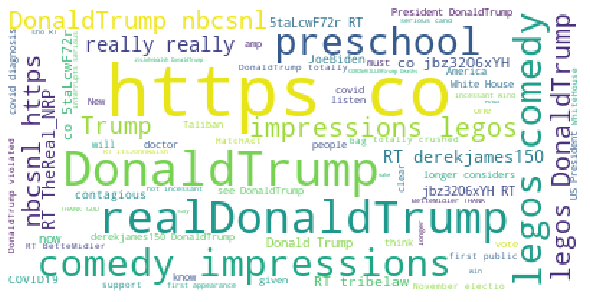

In [7]:
showwordCloud(Trump_reviews)

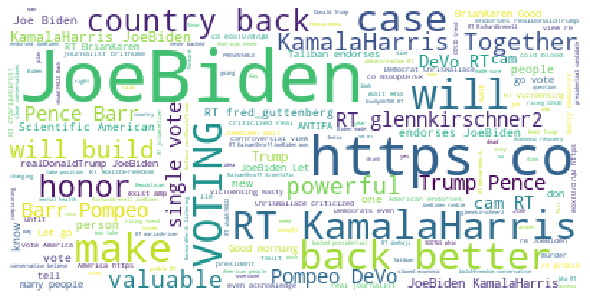

In [8]:
showwordCloud(Biden_reviews)

In [9]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

# df['Tweet_punct'] = df['text'].apply(lambda x: remove_punct(x))

In [10]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

# df['Tweet_tokenized'] = df['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
# df.head()

In [11]:
stopword = nltk.corpus.stopwords.words('english')

In [12]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
# df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
# df.head(10)

In [13]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

# df['Tweet_lemmatized'] = df['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
# df.head()

In [14]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [wn.lemmatize(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return " ".join(text)

In [15]:
clean_text(Trump_reviews['text'])

'rt tribelaw realdonaldtrump preschool lego comedy impression lego donaldtrump nbcsnl http co talcwfrbelieve tell none getting away listen anything donaldtrump say dead rt cupofjoeinthed atrupar hey dopeydon told right wing militia liberate michigan wackadoo cult following seeking help terrorist reinforcing desperate october hkt donaldtrump drumpf trump failupdate raw story seek help devastating poll number scoring taliban vote october http co nyeeocxqtrt drboycewatkins biden supporter saying million trump supporter going kill blackpeople donaldtrump suppo rt derekjames think msm job properly held politician account crime donaldtrump rt thereal_nrp realdonaldtrump preschool lego comedy impression lego donaldtrump nbcsnl http co jbzoxyhrt harryslaststand donaldtrump may longer contagious covid__ still super spreader fascism enc rt drboycewatkins democraticparty put donaldtrump office dr boyce watkins http co ciquzcfurt derekjames think msm job properly held politician account crime dona

In [16]:
def find_pol(review):
    return TextBlob(review).sentiment.polarity


Trump_reviews = pd.read_csv('trump_data.csv', encoding = 'utf-8')
Trump_reviews['cleaned_text'] = Trump_reviews['text'].apply(clean_text)
Trump_reviews['Sentiment_Polarity'] = Trump_reviews['cleaned_text'].apply(find_pol)
Trump_reviews['Expression Label'] = np.where(Trump_reviews['Sentiment_Polarity']>0,'positive', 'negative')
Trump_reviews['Expression Label'][Trump_reviews.Sentiment_Polarity ==0] = "Neutral"
Trump_reviews.tail()
Trump_reviews.to_csv('trump_data_with_senti.csv')

/home/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [17]:
Biden_reviews = pd.read_csv('biden_data.csv', encoding = 'utf-8')
Biden_reviews['cleaned_text'] = Biden_reviews['text'].apply(clean_text)
Biden_reviews['Sentiment_Polarity'] = Biden_reviews['cleaned_text'].apply(find_pol)
Biden_reviews['Expression Label'] = np.where(Biden_reviews['Sentiment_Polarity']>0,'positive', 'negative')
Biden_reviews['Expression Label'][Biden_reviews.Sentiment_Polarity ==0] = "Neutral"
Biden_reviews.tail()
Biden_reviews.to_csv('biden_data_with_senti.csv')

/home/a/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
